In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2
import os

from matplotlib.dates import DateFormatter

from load_wastewater_data import *

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [2]:
# define experiment to be preprocessed
experiment_series = "2024_10_15"

substance = "COVID" # one of PMMoV, COVID
rain_scenario = "MittelstarkerRegen"
degradation_settings = ["no_decay", "linear_decay_0_001", "constant_decay_0_1"]  # one of "no_decay", "linear_decay_dynamics", "constant_decay_dynamics"

degradation_setting_PMMoV = "no_decay"

normalization = "PMMoV_normalization"

In [3]:
df = pd.DataFrame()
for degradation_setting in degradation_settings:
    df_metrics = pd.read_csv(os.path.join("../data", normalization, f"metrics_{degradation_setting}_PMMoV_{degradation_setting_PMMoV}_{rain_scenario}.csv"))
    df_metrics["degradation_setting"] = degradation_setting
    #df_metrics["rain_scenario"] = rain_scenario
    df = pd.concat([df, df_metrics], ignore_index=True)

In [5]:
df["difference_in_errors"] = df["absolute_error"] - df["absolute_error_unnormalized"]

In [8]:
# print Latex table of metric values
#print(
df_metric = df.groupby(["degradation_setting", "sampling_point"]).mean()[["absolute_error", "absolute_error_unnormalized", "difference_in_errors"]]

df_metric.to_csv(os.path.join("../data", normalization,"normalization_error_per_station.csv"))# .to_latex())

In [15]:
df_metric # .loc[df_metric["difference_in_errors"]>0,:]

absolute_error  \
degradation_setting sampling_point                   
constant_decay_0_1  1                    69.853413   
                    2                    66.716456   
                    3                    76.598943   
                    4                    89.406771   
                    5                    71.321982   
                    6                    83.488056   
                    7                    78.152260   
                    8                    75.749513   
                    9                    62.101575   
                    10                   67.942488   
                    11                  154.428540   
                    12                   79.086147   
                    13                  102.068110   
                    14                   70.927701   
                    15                   49.777319   
                    16                   63.124398   
linear_decay_0_001  1                    23.926926   
                    2                    23.092664   
                    3                    30.415104   
                    4                    47.101306   
                    5                    55.077186   
                    6                    52.709328   
                    7                    49.998671   
                    8                    50.458914   
                    9                    21.543500   
                    10                   33.282801   
                    11                   82.237287   
                    12                   52.348649   
                    13                   62.242284   
                    14                   57.607652   
                    15                   46.928700   
                    16                   53.690663   
no_decay            1                    15.265348   
                    2                    13.979150   
                    3                    13.966722   
                    4                    23.372897   
                    5                    30.002372   
                    6                    25.878796   
                    7                    25.070550   
                    8                    23.770922   
                    9                    14.354313   
                    10                   15.351748   
                    11                   46.452715   
                    12                   25.317221   
                    13                   25.958298   
                    14                   22.754435   
                    15                   24.180067   
                    16                   17.064136   

                                    absolute_error_unnormalized  \
degradation_setting sampling_point                                
constant_decay_0_1  1                                118.535247   
                    2                                130.766300   
                    3                                117.980710   
                    4                                123.902991   
                    5                                 99.469991   
                    6                                143.034454   
                    7                                114.240637   
                    8                                109.408406   
                    9                                112.654759   
                    10                               109.512493   
                    11                               232.802845   
                    12                               108.283160   
                    13                               120.295099   
                    14                                96.184576   
                    15                                88.004193   
                    16                                89.507159   
linear_decay_0_001  1                                 79.831123   
                    2                                 95.67012

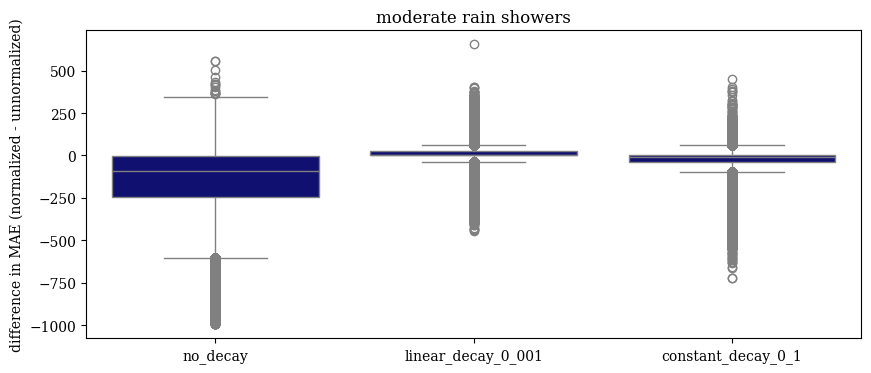

In [14]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 16), :]

if rain_scenario=="MittelstarkerRegen":
    c = "navy"
    t = "moderate rain showers"
else:
    c = "cornflowerblue"
    t = "moderate gentle rain showers"


# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color=c, linecolor="grey")

# Set y-axis label
ax.set_ylabel("difference in MAE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
#new_labels = ['no decay', 'linear decay dynamics', 'constant decay dynamics']
#ax.set_xticklabels(new_labels)

# Display the plot
plt.title(t)
plt.show()

/tmp/ipykernel_64847/262516415.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


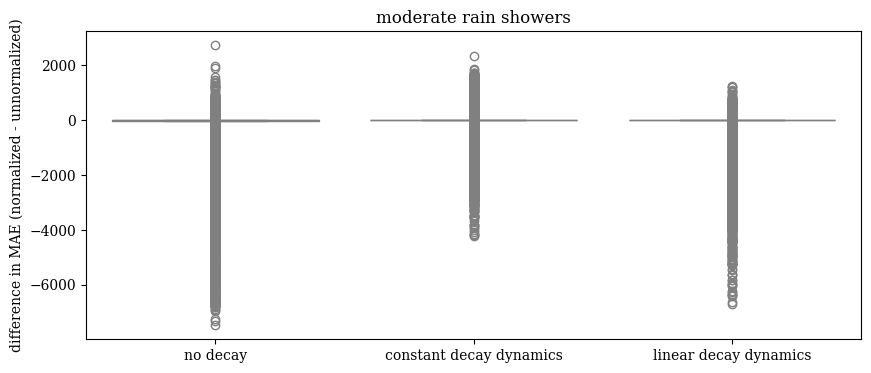

In [9]:
# Assuming df_sub is already defined
df_sub = df.loc[(df.sampling_point == 1), :]

if rain_scenario=="MittelstarkerRegen":
    c = "navy"
    t = "moderate rain showers"
else:
    c = "cornflowerblue"
    t = "moderate gentle rain showers"


# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x="degradation_setting", y="difference_in_errors", data=df_sub, ax=ax, color=c, linecolor="grey")

# Set y-axis label
ax.set_ylabel("difference in MAE (normalized - unnormalized)")
ax.set_xlabel("")

# Set new x-axis labels
new_labels = ['no decay', 'linear decay dynamics', 'constant decay dynamics']
ax.set_xticklabels(new_labels)

# Display the plot
plt.title(t)
plt.show()